<a href="https://colab.research.google.com/github/chiharuishida/Beginner/blob/main/Rain_Prediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Supervised Learning: KNN for Classification - Will it rain today?**
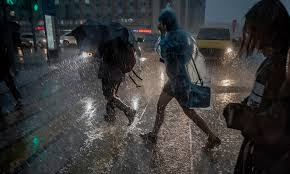
---

Here the goal is to create a KNN model using `K = 5` to predict the class variable <RainToday>  (`RainToday = 1`) or not (`RainToday = 0`).

#### **Step #1: Load in data**

**Run the code below to load the data.**

In [ ]:
# libraries needed. matplotlib is a an alternative to Seaborn for visualizations. sklearn is a good library for statistical analyses of all sorts
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
url = "https://raw.githubusercontent.com/chiharuishida/Tutorialdata/main/Weather%20Training%20Data%20Simple.csv"
rainfall_df = pd.read_csv(url)
rainfall_df = rainfall_df.drop("RainTomorrow", axis = 1)

rainfall_df.head()

,Location,WindSpeed,Humidity,Pressure,Temp,RainToday
0,Albury,20,71,10.077,16.9,0
1,Albury,4,44,10.106,17.2,0
2,Albury,7,82,10.108,17.8,0
3,Albury,19,55,10.092,20.6,0
4,Albury,6,48,10.134,16.3,0


#### **Steps #2-3: Decide which variables to use as features and label/class and split data into training and testing sets**

##### **1.** Visualize `Humidity` and `Pressure` colored by `RainToday` to see if there's any visual hints of how to classify this data.

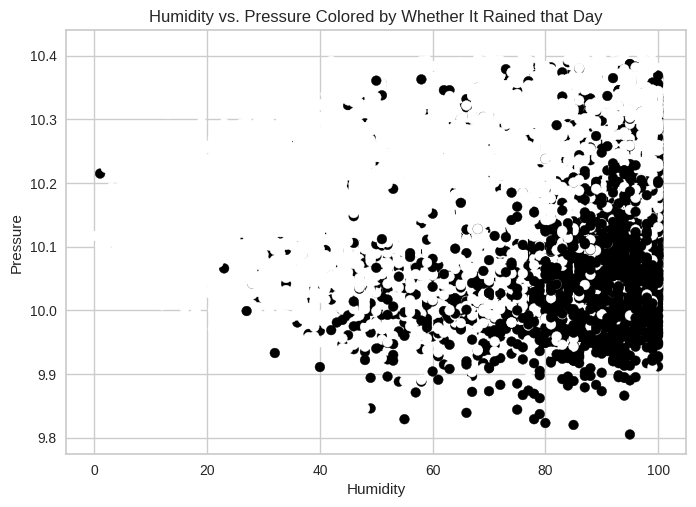

In [ ]:
plt.scatter(rainfall_df["Humidity"], rainfall_df["Pressure"], c = rainfall_df["RainToday"])

plt.title("Humidity vs. Pressure Colored by Whether It Rained that Day")
plt.xlabel("Humidity")
plt.ylabel("Pressure")

plt.show()

White is not showing well. to change color scheme (called cmap) on Matplotlib, go to https://matplotlib.org/stable/users/explain/colors/colormaps.html
Keep in mind it's case-sensive. Add   cmap="colorschmeyouchose" after c = rainfall_df["RainToday"] separated by a comma

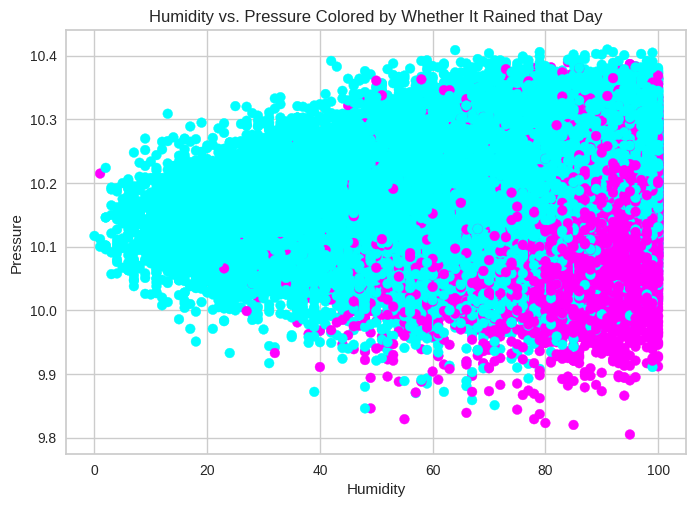

In [ ]:
plt.scatter(rainfall_df["Humidity"], rainfall_df["Pressure"], c = rainfall_df["RainToday"], cmap="cool")

plt.title("Humidity vs. Pressure Colored by Whether It Rained that Day")
plt.xlabel("Humidity")
plt.ylabel("Pressure")

plt.show()

##### **2.** Split the data into training and test sets
First, we will create two subsets of dataframes: input variables and output

In [ ]:
inputs = rainfall_df[["Humidity", "Pressure"]]
output = rainfall_df["RainToday"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Scaling data**
**NOTE**: Scaling means standardizing each datapoint so that mean = 0, standard deviation = 1 for when the data distribution (the bell curve) looks skewed, too flat, too high of peaks, etc. We often automatically standardize data just in case

In [ ]:
mu = X_train.mean() # this is created for mean-centering
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

#### **Steps #4-6: Import ML algorithm, initialize model, and train/fit model on the training dataset**


Create and fit a KNN model on training data using a standard K value of 5.


In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 5)

# fit
model.fit(X_train, y_train)

KNeighborsClassifier()

#### **Steps #7-8: Make predictions**

Specifically, use
1. the accuracy score to get a simple overall picture of your model's performance
2. the confusion matrix (amount each in false positive, true positive, false negative, true negative) to get a more nuanced view of where the model is performing the best and worst

##### **1. Accuracy Score**

In [ ]:
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7853406086516285


##### **2. Confusion Matrix**

**Run the code below to see the confusion matrix.**

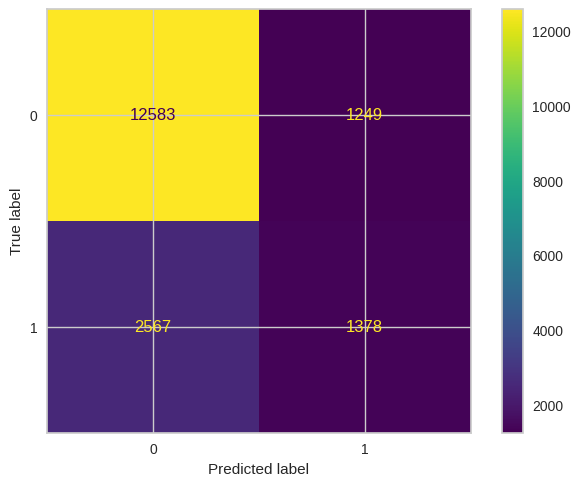

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Now let's change from K=5 to another value. Did the accuracy improve???

#### **Now, apply your model**


Let's apply this model to entirely new `Humidity` and `Pressure` points.

**NOTE:** We will have to scale these inputs the same way as the training/testing data for the model to work properly.

##### **1. `Humidity = 85` and `Pressure = 9.8`**

**Run the code below to classify these conditions.**

In [ ]:
new_day = pd.DataFrame([[85, 9.8]], columns = ["Humidity", "Pressure"])
new_day = (new_day - mu)/sig

pred = model.predict(new_day)

print(pred)

[1]


##### **2. `Humidity = 20` and `Pressure = 10.2`**

In [ ]:
new_day = pd.DataFrame([[20, 10.2]], columns = ["Humidity", "Pressure"])
new_day = (new_day - mu)/sig

pred = model.predict(new_day)

print(pred)

[0]
